## Loading csv file

In [2]:
import joblib

model = joblib.load('scaler.pkl')
print("Model type:", type(model))


Model type: <class 'sklearn.preprocessing._data.MinMaxScaler'>


In [65]:
import pandas as pd

df = pd.read_csv("file.csv")
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,CUST0001,Male,56.0,4.0,0.00,4.0,0.0,0.0,40282.42,1.0
1,CUST0002,NaN,28.0,8.0,67408.01,4.0,0.0,1.0,27333.51,0.0
2,CUST0003,Female,47.0,6.0,1154.97,1.0,0.0,1.0,99514.91,1.0
3,CUST0004,Male,42.0,1.0,0.00,2.0,1.0,1.0,146588.22,0.0
4,CUST0005,Male,64.0,3.0,77109.94,4.0,0.0,0.0,131792.25,0.0


## Data Visualization before EDA

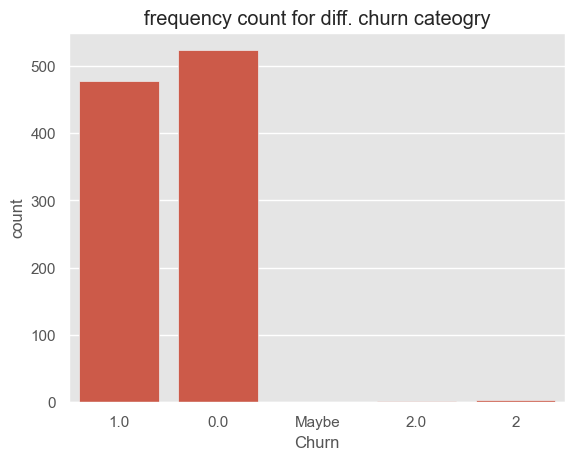

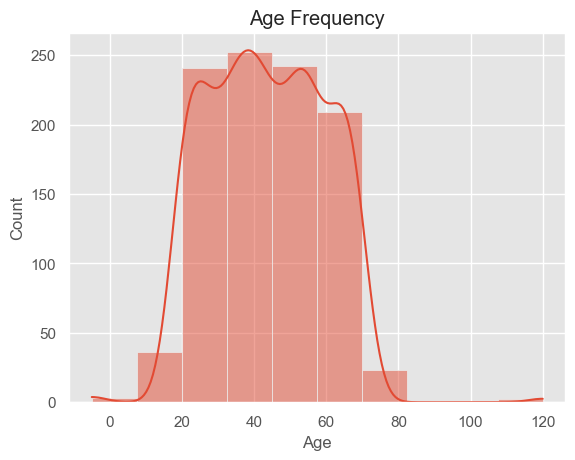

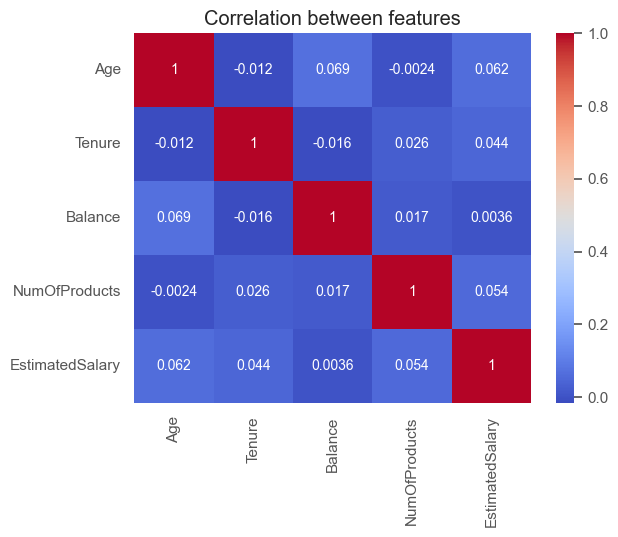

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('frequency count for diff. churn cateogry')
plt.show()

sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Frequency')
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

## Exploratory Data Analysis

In [70]:
print(df.dtypes)

CustomerID          object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Churn               object
dtype: object


In [71]:
print(df.isnull().sum())  # Check missing values

CustomerID         0
Gender             6
Age                2
Tenure             3
Balance            4
NumOfProducts      4
HasCrCard          2
IsActiveMember     5
EstimatedSalary    1
Churn              0
dtype: int64


#### Drop rows where 'Churn' is missing (target variable)


In [72]:
# Drop rows where 'Churn' is missing (target variable)
df.dropna(subset=['Churn'], inplace=True)

#### Filling null values(mean for numeric cols, median for categorical cols.)


In [73]:
# Fill numeric columns with median
num_cols = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = ['Gender', 'HasCrCard', 'IsActiveMember']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



#### Checking for null values after nan filling

In [74]:
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

### Checking for incosistencies in different attributes

In [76]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'CustomerID':
        unique_vals = df[col].unique()
        print(f"\nColumn: {col} (Type: {df[col].dtype})")
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}")


Column: Gender (Type: object)
Unique Values (6): ['Male' 'Female' 'FEMALE' ' male ' 'MALE' ' Female']

Column: HasCrCard (Type: object)
Unique Values (4): ['0.0' '1.0' '2.0' 'Yes']

Column: IsActiveMember (Type: object)
Unique Values (5): ['0.0' '1.0' '-1' 'No' '-1.0']

Column: Churn (Type: object)
Unique Values (5): ['1.0' '0.0' 'Maybe' '2.0' '2']


## Cleaning and standardising categorical columns

##### Upon observing, was found that values inside Gender column has whitespaces around them.

In [77]:
df['Gender'] = df['Gender'].str.strip().str.lower()  # remove spaces and lowercase
df['Gender'] = df['Gender'].replace({
    'male': 'Male',
    'female': 'Female'
})


In [78]:
# Convert all values to string first
df['HasCrCard'] = df['HasCrCard'].astype(str).str.strip()

# Map valid values only
df['HasCrCard'] = df['HasCrCard'].replace({
    '1.0': 1, '0.0': 0, 'Yes': 1, 'No': 0, '2.0': 1  # if 2.0 means yes
})

df['HasCrCard'] = df['HasCrCard'].astype(int)


#### assuming values > 0 means 'yes' otherwise 'no'

In [79]:
df['IsActiveMember'] = df['IsActiveMember'].astype(str).str.strip()

df['IsActiveMember'] = df['IsActiveMember'].replace({
    '1.0': 1, '0.0': 0, '-1': 0, '-1.0': 0, 'No': 0, 'Yes': 1
}).astype(int)


In [80]:
df['Churn'] = df['Churn'].astype(str).str.strip()

# Drop rows that are not 0 or 1 (e.g., "Maybe", "2.0")
df = df[df['Churn'].isin(['0.0', '1.0'])]

# Now map to integers
df['Churn'] = df['Churn'].replace({'1.0': 1, '0.0': 0}).astype(int)


In [81]:
print(df.dtypes)

CustomerID          object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary    float64
Churn                int32
dtype: object


### After standardizing and cleaning, only Gender attribute was found to be categorical

In [ ]:
# Encoding categorical features
df = pd.get_dummies(df, columns=['Gender'], drop_   first=True)


### After cleaning

In [83]:
df.head()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Gender_Male
0,CUST0001,56.0,4.0,0.00,4.0,0,0,40282.42,1,True
1,CUST0002,28.0,8.0,67408.01,4.0,0,1,27333.51,0,False
2,CUST0003,47.0,6.0,1154.97,1.0,0,1,99514.91,1,False
3,CUST0004,42.0,1.0,0.00,2.0,1,1,146588.22,0,True
4,CUST0005,64.0,3.0,77109.94,4.0,0,0,131792.25,0,True


### Checking for data imbalance 

In [84]:
print(df['Churn'].value_counts())
### found to be balanced, so no need for further action

Churn
0    523
1    478
Name: count, dtype: int64


#### Checking for discrepancies in age column

In [85]:
print(df['Age'].describe())

count    1001.000000
mean       43.785215
std        15.895560
min        -5.000000
25%        31.000000
50%        43.000000
75%        56.000000
max       120.000000
Name: Age, dtype: float64


### As it's credit card, user must be between 18 and 100(max life exp. assumed)

In [86]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

In [87]:
df.shape

(996, 10)

## Visualisations

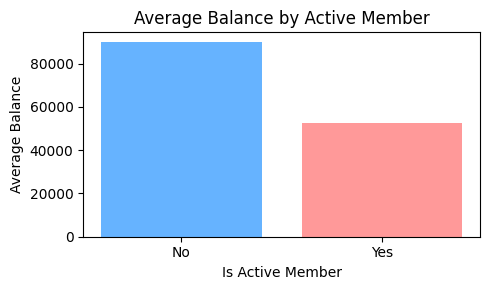

In [1]:
#Average Balance by Active Member
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv("cleaned_file.csv")

# Convert IsActiveMember to readable format if needed
df['IsActiveMember'] = df['IsActiveMember'].map({1: 'Yes', 0: 'No'})

# Group and calculate average balance
avg_balance = df.groupby('IsActiveMember')['Balance'].mean()

# Plot
plt.figure(figsize=(5, 3))
plt.bar(avg_balance.index, avg_balance.values, color=['#66b3ff', '#ff9999'])
plt.title("Average Balance by Active Member")
plt.xlabel("Is Active Member")
plt.ylabel("Average Balance")
plt.tight_layout()
plt.show()


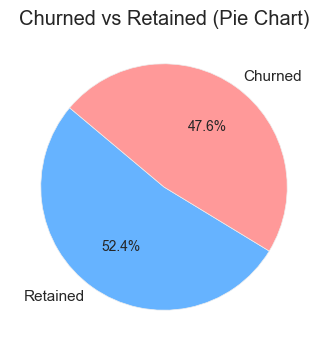

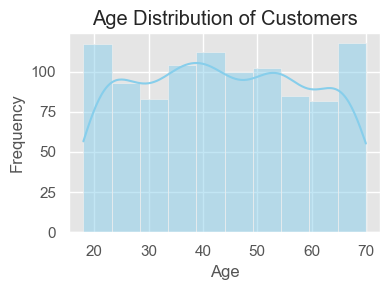

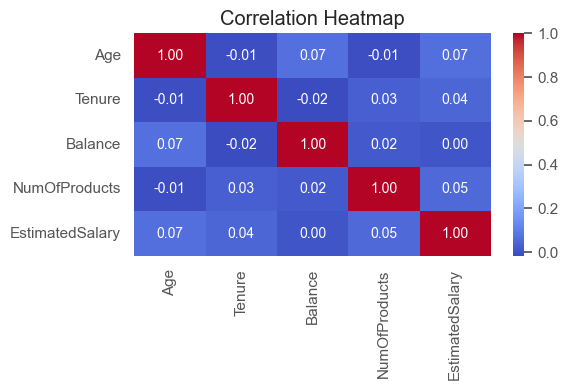

C:\Users\shubh\AppData\Local\Temp\ipykernel_18316\654085032.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_idx], y=features[top_idx], palette="crest")


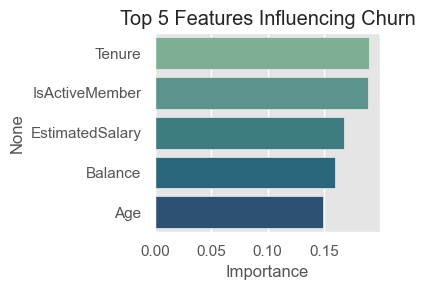

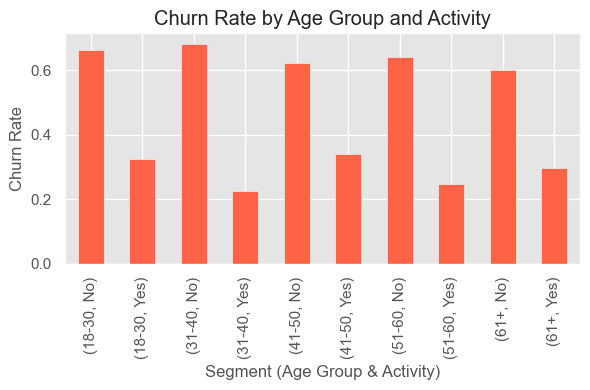

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
import os

# Load and preprocess data
df = pd.read_csv("cleaned_file.csv")
df['HasCrCard'] = df['HasCrCard'].map({1: 'Yes', 0: 'No'})
df['IsActiveMember'] = df['IsActiveMember'].map({1: 'Yes', 0: 'No'})
df['Churn'] = df['Churn'].map({1: 'Churned', 0: 'Retained'})

sns.set(style='whitegrid')
plt.style.use('ggplot')

# 1. Pie Chart: Churned vs Retained
plt.figure(figsize=(4, 4))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#66b3ff', '#ff9999'])
plt.title('Churned vs Retained (Pie Chart)')
plt.savefig("visualisation/1_churn_pie_chart.png")
plt.show()

# 2. Histogram of Age
plt.figure(figsize=(4, 3))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("visualisation/2_age_histogram.png")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(6, 4))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("visualisation/3_correlation_heatmap.png")
plt.show()

# 4. Feature Importance (Top 5 Reasons Customers Churn)
model = load("churn_model.pkl")
# X = df.drop(columns=['CustomerID', 'Churn'])
X = pd.get_dummies(X, drop_first=True)
importances = model.feature_importances_
features = X.columns

top_idx = importances.argsort()[-5:][::-1]
plt.figure(figsize=(4, 3))
sns.barplot(x=importances[top_idx], y=features[top_idx], palette="crest")
plt.title('Top 5 Features Influencing Churn')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig("visualisation/4_feature_importance.png")
plt.show()

# 5. Customer Segments with Highest Churn
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100],
                        labels=['18-30', '31-40', '41-50', '51-60', '61+'])
segment_churn = df.groupby(['AgeGroup', 'IsActiveMember'])['Churn'].value_counts(normalize=True).unstack().fillna(0)['Churned']

segment_churn.plot(kind='bar', figsize=(6, 4), color='tomato')
plt.title('Churn Rate by Age Group and Activity')
plt.ylabel('Churn Rate')
plt.xlabel('Segment (Age Group & Activity)')
plt.tight_layout()
plt.savefig("visualisation/5_segment_churn.png")
plt.show()

In [88]:
df.head()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Gender_Male
0,CUST0001,56.0,4.0,0.00,4.0,0,0,40282.42,1,True
1,CUST0002,28.0,8.0,67408.01,4.0,0,1,27333.51,0,False
2,CUST0003,47.0,6.0,1154.97,1.0,0,1,99514.91,1,False
3,CUST0004,42.0,1.0,0.00,2.0,1,1,146588.22,0,True
4,CUST0005,64.0,3.0,77109.94,4.0,0,0,131792.25,0,True


In [91]:
#dropping customer id as it's an identifier only.
df.drop('CustomerID', axis=1, inplace=True)

In [92]:
# Split features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

#### MinMax Scaling

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [95]:
#save the cleaned dataframe to a new csv file
df.to_csv('cleaned_file.csv', index=False)

### test train split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


### train random forest on training data

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [98]:
y_pred = model.predict(X_test)

### Classification result on Vanilla RandomForest algo.

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*1e2:.4f}")


Confusion Matrix:
 [[78 27]
 [36 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       105
           1       0.69      0.62      0.65        95

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200

Accuracy: 68.5000


### Applying Grid search CV with RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [101]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

## saving the best model found

In [102]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [103]:
y_pred = best_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*1e2:.4f}")

Confusion Matrix:
 [[78 27]
 [29 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       105
           1       0.71      0.69      0.70        95

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

Accuracy: 72.0000


In [ ]:
import pickle

# Save the best model (from GridSearchCV)
with open('final.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as final.pkl")


Model saved as churn_model.pkl


## Testing on single instance

In [105]:
import pandas as pd
import joblib  # or use pickle
from sklearn.preprocessing import MinMaxScaler

# Load the saved model and scaler
model = joblib.load('churn_model.pkl')         # Replace with your actual filename
scaler = joblib.load('scaler.pkl')       # If you saved the scaler too

# Example new data (1 or more records)
new_data = pd.DataFrame([{
    'CustomerID': 'CUST0100',
    'Gender': 'Female',
    'Age': 29,
    'Tenure': 5,
    'Balance': 65000,
    'NumOfProducts': 1,
    'HasCrCard': 'No',
    'IsActiveMember': 'Yes',
    'EstimatedSalary': 72000
}])


# Drop before preprocessing
new_data.drop('CustomerID', axis=1, inplace=True)
# Preprocess new data similarly
# Fill missing numeric values with median (assuming no NaNs here)
# Map categorical columns

new_data['Gender'] = new_data['Gender'].str.strip().str.lower().replace({
    'male': 'Male',
    'female': 'Female'
})
new_data['HasCrCard'] = new_data['HasCrCard'].astype(str).str.strip().replace({
    '1.0': 1, '0.0': 0, 'Yes': 1, 'No': 0, '2.0': 1
}).astype(int)
new_data['IsActiveMember'] = new_data['IsActiveMember'].astype(str).str.strip().replace({
    '1.0': 1, '0.0': 0, '-1': 0, '-1.0': 0, 'No': 0, 'Yes': 1
}).astype(int)

# One-hot encode 'Gender' (make sure same columns as training data)
new_data = pd.get_dummies(new_data, columns=['Gender'], drop_first=True)

# Ensure 'Gender_Male' exists even if not in current input
if 'Gender_Male' not in new_data.columns:
    new_data['Gender_Male'] = 0  # Add missing column with 0

# Reorder columns to match training input (excluding 'Churn')
expected_cols = ['Age', 'Tenure', 'Balance', 'NumOfProducts',
                 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Male']
new_data = new_data[expected_cols]

# Apply MinMax scaling
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)

print("Predicted Churn:", prediction[0])
print("Churn Probability:", prediction_proba[0][1])


Predicted Churn: 0
Churn Probability: 0.33080193254457946


##### For inference time if someone enters garbage value, program will handle it

In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load model and scaler
model = joblib.load('churn_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define default values
default_values = {
    'Gender': 'Female',
    'Age': 35,
    'Tenure': 3,
    'Balance': 50000.0,
    'NumOfProducts': 2,
    'HasCrCard': 'Yes',
    'IsActiveMember': 'No',
    'EstimatedSalary': 60000.0
}

def safe_inference(raw_data: dict):
    # Keep CustomerID separately
    customer_id = raw_data.get('CustomerID', 'UNKNOWN')

    # Start with default-safe values
    data = {}
    for k, default in default_values.items():
        val = raw_data.get(k, default)
        if val is None or (isinstance(val, float) and np.isnan(val)):
            data[k] = default
        else:
            data[k] = val

    df = pd.DataFrame([data])

    # Gender processing
    df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().replace({
        'male': 'Male',
        'female': 'Female'
    })
    if df['Gender'].iloc[0] not in ['Male', 'Female']:
        df['Gender'] = default_values['Gender']

    # HasCrCard
    df['HasCrCard'] = df['HasCrCard'].astype(str).str.strip().replace({
        '1.0': 1, '0.0': 0, 'Yes': 1, 'No': 0, '2.0': 1
    })
    try:
        df['HasCrCard'] = df['HasCrCard'].astype(int)
    except:
        df['HasCrCard'] = int(default_values['HasCrCard'] == 'Yes')

    # IsActiveMember
    df['IsActiveMember'] = df['IsActiveMember'].astype(str).str.strip().replace({
        '1.0': 1, '0.0': 0, '-1': 0, '-1.0': 0, 'No': 0, 'Yes': 1
    })
    try:
        df['IsActiveMember'] = df['IsActiveMember'].astype(int)
    except:
        df['IsActiveMember'] = int(default_values['IsActiveMember'] == 'Yes')

    # One-hot encode Gender
    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

    # Ensure Gender_Male exists
    if 'Gender_Male' not in df.columns:
        df['Gender_Male'] = 0

    # Ensure all expected columns are present
    expected_cols = ['Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Male']
    for col in expected_cols:
        if col not in df.columns:
            df[col] = default_values.get(col, 0)

    # Reorder columns
    df = df[expected_cols]

    # Final safety check: fill any NaNs again
    df.fillna({col: default_values.get(col, 0) for col in df.columns}, inplace=True)

    # Scale
    try:
        df_scaled = scaler.transform(df)
    except Exception as e:
        print(f"Scaling failed: {e}")
        return None

    # Predict
    prediction = model.predict(df_scaled)
    prediction_proba = model.predict_proba(df_scaled)

    return {
        'CustomerID': customer_id,
        'PredictedChurn': int(prediction[0]),
        'ChurnProbability': round(prediction_proba[0][1], 4)
    }

# Example call
new_input = {
    'CustomerID': 'CUST1055',
    'Gender': 'alien',
    'Age': None,
    'Tenure': 4,
    'Balance': None,
    'NumOfProducts': 3,
    'HasCrCard': 'Maybe',
    'IsActiveMember': '1.0',
    'EstimatedSalary': 70000
}

result = safe_inference(new_input)
print(result)


{'CustomerID': 'CUST1055', 'PredictedChurn': 0, 'ChurnProbability': 0.1329}
